### Program 3 of 3
### Purpose: Model Building and Evaluation
### Programs: Data split in train and test, data scaling, build and train models, model tests and results
### Inputs: Labeled data for training and testing
### Outputs: Models and Test results of alternative RF, MLP, and Hybrid RF-MLP models 
### Developer: Rweyemamu Barongo rbarongo@gmail.com, ribarongo@bot.go.tz, ribarongo@udsm.ac.tz

#### Install Libraries

In [1]:
#working with xls files
#!pip install --upgrade xlrd

In [2]:
#!pip install xlwt

In [3]:
#for loading saved machine learning models
#!pip install pickle

In [4]:
#!pip install tensorflow

In [5]:
#!pip install scikit-learn

In [6]:
#!pip install imbalanced-learn

In [7]:
#!pip install pandas

In [8]:
#!pip install matplotlib

In [9]:
#!pip install seaborn

#### Import Libraries

In [10]:
import preparation
from preparation import install_missing_packages
install_missing_packages()


# #preliminary libraries
# import config_unix_filesystem as config
# from config_unix_filesystem import install_missing_packages
# install_missing_packages()

#data processing libraries
import pandas as pd
import numpy as np

#data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

#configuration of data files
import config_unix_filesystem as config
from config_unix_filesystem import check_model_results_file
from config_unix_filesystem import check_if_exist_or_create_folders
from config_unix_filesystem import check_data_files_III
from config_unix_filesystem import install_missing_packages

#setup colab libraries if working in colab
try:
    import google.colab
except:
    print("It's ok. You just don't need google.colab libraries outside google platform")
from datetime import date

#data spliting
from sklearn.model_selection import train_test_split

#data scaling
from sklearn.preprocessing import StandardScaler

#chains and combinations
from itertools import chain, combinations

#machine learning algorithms
from sklearn.linear_model import LogisticRegression

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Deep Learning 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

#machine learning metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import geometric_mean_score
#ROC curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

from sklearn.datasets import make_circles

#upsampling
from sklearn.utils import resample

#visualization
from matplotlib.pyplot import figure
#loading saved model
import pickle

#other imports
from datetime import time
import time as tm

2023-11-16 17:10:48.289489: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 17:10:48.337681: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 17:10:48.338485: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-16 17:10:49.034357: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


It's ok. You just don't need google.colab libraries outside google platform


#### inspect configurations and input data

In [11]:
check_data_files_III()
check_if_exist_or_create_folders()
check_model_results_file()


Folder 'data/final' created.
Folder 'data/intermediate' created.
Folder 'data/model_input' created.
Folder 'data/model_test' created.
Folder 'data/static' created.
File '../results/models_results.csv' created with header columns.


#### Models Configurations

In [12]:
# RF
num_estimators = 199

#MLP
#Model selection
num_model = 6                    #1 to 9 for M1 to M9
loss_function = 'sparse_categorical_crossentropy'
number_of_epochs = 30
training_validation_split = 0.3

#### Load data from files

In [13]:
dataset = pd.read_csv(config.dataWbook) #, sheet_name="finalDataset_240622", header=1)
unnamedCols = [col for col in dataset.columns if 'Unnamed' in col]
dataset.drop(columns=unnamedCols, inplace=True)
dataset.shape 

df_inputs_X = pd.read_csv(config.model_inputs_X, parse_dates=["REPORTINGDATE"])
unnamedCols2 = [col for col in df_inputs_X.columns if 'Unnamed' in str(col)]
df_inputs_X.drop(columns=unnamedCols2, inplace=True)

df_inputs_Y = pd.read_csv(config.model_inputs_Y)
unnamedCols2 = [col for col in df_inputs_Y.columns if 'Unnamed' in str(col)]
df_inputs_Y.drop(columns=unnamedCols2, inplace=True)

#df_results = pd.read_csv(results, parse_dates=["date"])
df_results = pd.read_csv(config.results)
unnamedCols2 = [col for col in df_results.columns if 'Unnamed' in str(col)]
df_results.drop(columns=unnamedCols2, inplace=True)
try:
    df_results['date'] = pd.to_datetime(df_results['date']) #, unit='d', origin='1899-12-30')
except:
    print("column or file {} do not exist".format(config.results))

In [14]:
#temporary storage of test results
try:
    sno_val = max(0,df_results['sno'].max()) + 1
    sno_val
except:
    sno_val = 1

df_tmp_results = df_results.iloc[0:0]
df_tmp_results['sno']= [sno_val]
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'date'] = date.today() 

/tmp/ipykernel_82/1040156644.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp_results['sno']= [sno_val]
/tmp/ipykernel_82/1040156644.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'date'] = date.today()


#### Select input features and target column

In [15]:
#model input features without identity of banks and reporting date
scaled_X = df_inputs_X[[  
'BANKSIZE', 
'LR',
'EWAQ_NPLsNetOfProvisions',  
'EWAQ_NPLsNetOfProvisions2CoreCapital', #little contribution
'EWAQ_NPL', 
'ExcessShortTLiab2LongTAsset',
'CD_TO_TOTAL_ASSET',
'LIQASSET2TOTALASSET',  
'LIQASSET2DEPOSIT', 
'TOTAL_DEPOSITS'
]]

#model input features with bank codes and reporting date for practical performance benchmarking
scaled_X_bm = df_inputs_X[[
'REPORTINGDATE',    
'INSTITUTIONCODE',    
'BANKSIZE', 
'LR',
'EWAQ_NPLsNetOfProvisions',  
'EWAQ_NPLsNetOfProvisions2CoreCapital', #little contribution
'EWAQ_NPL', 
'ExcessShortTLiab2LongTAsset',
'CD_TO_TOTAL_ASSET',
'LIQASSET2TOTALASSET',  
'LIQASSET2DEPOSIT', 
'TOTAL_DEPOSITS'
]]

#model target/label
Y = df_inputs_Y[['XX_MLA_CLASS2']]

In [16]:
#recording input variables/features that were used
if 'BANKSIZE' in scaled_X.columns:
    df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'BANKSIZE'] = 'ok' 
if 'LR' in scaled_X.columns:    
    df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'LR'] = 'ok' 
if 'EWAQ_NPLsNetOfProvisions' in scaled_X.columns: 
    df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'EWAQ_NPLsNetOfProvisions'] = 'ok' 
if 'EWAQ_NPLsNetOfProvisions2CoreCapital' in scaled_X.columns: 
    df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'EWAQ_NPLsNetOfProvisions2CoreCapital'] = 'ok' 
if 'EWAQ_NPL' in scaled_X.columns: 
    df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'EWAQ_NPL'] = 'ok'     
if 'ExcessShortTLiab2LongTAsset' in scaled_X.columns: 
    df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'ExcessShortTLiab2LongTAsset'] = 'ok' 
if 'CD_TO_TOTAL_ASSET' in scaled_X.columns: 
    df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'CD_TO_TOTAL_ASSET'] = 'ok' 
if 'LIQASSET2TOTALASSET' in scaled_X.columns: 
    df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'LIQASSET2TOTALASSET'] = 'ok' 
if 'LIQASSET2DEPOSIT' in scaled_X.columns: 
    df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'LIQASSET2DEPOSIT'] = 'ok' 
if 'TOTAL_DEPOSITS' in scaled_X.columns: 
    df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'TOTAL_DEPOSITS'] = 'ok' 



In [17]:
factors = pd.concat([scaled_X, Y], axis = 1)
factors.columns

Index(['BANKSIZE', 'LR', 'EWAQ_NPLsNetOfProvisions',
       'EWAQ_NPLsNetOfProvisions2CoreCapital', 'EWAQ_NPL',
       'ExcessShortTLiab2LongTAsset', 'CD_TO_TOTAL_ASSET',
       'LIQASSET2TOTALASSET', 'LIQASSET2DEPOSIT', 'TOTAL_DEPOSITS',
       'XX_MLA_CLASS2'],
      dtype='object')

In [18]:
#transpose target values
Y.T.values[0]

array([1, 1, 1, ..., 1, 1, 1])

In [19]:
Y.T.values[0].shape

(20878,)

**Split Dataset into Train and Test datasets**

In [20]:
#without bank codes and reporting date
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(scaled_X,Y,test_size=0.33,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(scaled_X.values,Y.T.values[0],test_size=0.33,random_state=42)

In [21]:
##with bank codes for practical performance benchmarking
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(scaled_X,Y,test_size=0.33,random_state=42)
X_train_bm, X_test_bm, y_train_bm, y_test_bm = train_test_split(scaled_X_bm.values,Y.T.values[0],test_size=0.33,random_state=42)

In [22]:
result = X_train[2:, :] == X_train_bm[2:, 2:]
print(result)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [23]:
result.shape

(13986, 10)

In [24]:
result = X_test[2:, :] == X_test_bm[2:, 2:]
print(result)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [25]:
result.shape

(6888, 10)

In [26]:
result = y_test == y_test_bm
print(result)

[ True  True  True ...  True  True  True]


**Scaling datasets (using Standard Scaler)**

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [28]:
#temporarily scrapped bank codes for scaling
X_train_bm_scrapped=sc.fit_transform(X_train_bm[:,2:])
X_test_bm_scrapped=sc.transform(X_test_bm[:,2:])

# Concatenate the first two columns from the original arrays with the scaled arrays
X_train_bm2 = np.hstack((X_train_bm[:, :2], X_train_bm_scrapped))
X_test_bm2 = np.hstack((X_test_bm[:, :2], X_test_bm_scrapped))


In [29]:
X_train_bm2

array([[Timestamp('2014-07-11 00:00:00'), 'B5418', -0.3090925395687512,
        ..., -0.45919308985183777, -0.014611229390741559,
        -0.35122863546587685],
       [Timestamp('2010-07-30 00:00:00'), 'B5912', 1.4944582408495175,
        ..., 0.054032151328555676, -0.014611229390741994,
        1.4158612472175431],
       [Timestamp('2021-05-21 00:00:00'), 'B5919', -1.539971211070949,
        ..., -0.07437665970050605, -0.014611229390624461,
        -0.47241399306381787],
       ...,
       [Timestamp('2013-05-31 00:00:00'), 'B5213', 0.8776453057031665,
        ..., -0.6366455558622105, -0.014611229390719165,
        -0.02727118905334712],
       [Timestamp('2014-02-21 00:00:00'), 'B5015', 1.8321985270954604,
        ..., -0.02611886826237614, -0.014611229390752675,
        2.820098883154293],
       [Timestamp('2017-05-12 00:00:00'), 'B5813', -0.13479792552641082,
        ..., 1.2653545454556752, -0.01461122939060852,
        -0.36044723846913035]], dtype=object)

In [30]:
X_train.shape[1]

10

#### Building Machine Learning Models

**(a) Model Building using Imbalanced Data (Original data before treating imbalances)**

<!-- #### Logistic Regression With Imbalanced Data (for performance comparison with target models) -->

#### Random Forest With Imbalanced Data (for performance comparison with target models)

In [31]:
# train model
#num_estimators = 199
rfc = RandomForestClassifier(n_estimators=num_estimators).fit(X_train, y_train)

# save the model to disk
pickle.dump(rfc, open(config.rfc, 'wb'))

# load the model from disk
rfc = pickle.load(open(config.rfc, 'rb'))

# predict on test set
rfc_pred = rfc.predict(X_test)

rfc_accuracy = accuracy_score(y_test, rfc_pred)
rfc_precision = precision_score(y_test, rfc_pred, average='weighted')
#0.9995
rfc_f1_score = f1_score(y_test, rfc_pred,average='weighted')
#0.8666
rfc_recall = recall_score(y_test, rfc_pred,average='weighted')
#0.7878
print("Evaluating Random Forest \n Confusion Matrix:\n{}\n ClassificationReport:\n{}\n Random Forest Accuracy={} \n Precision={} \n F1 Score={} \nRecall={}".format(confusion_matrix(y_test,rfc_pred),
                                                                                                                    classification_report(y_test,rfc_pred),
                                                                                                                    rfc_accuracy,rfc_precision,rfc_f1_score,rfc_recall))




Evaluating Random Forest 
 Confusion Matrix:
[[2924   93    6    0    0]
 [ 114 1740  106    0    0]
 [   2  124 1670    3    1]
 [   0    0   17   53    3]
 [   0    0    1    2   31]]
 ClassificationReport:
              precision    recall  f1-score   support

           1       0.96      0.97      0.96      3023
           2       0.89      0.89      0.89      1960
           3       0.93      0.93      0.93      1800
           4       0.91      0.73      0.81        73
           5       0.89      0.91      0.90        34

    accuracy                           0.93      6890
   macro avg       0.92      0.88      0.90      6890
weighted avg       0.93      0.93      0.93      6890

 Random Forest Accuracy=0.9314949201741655 
 Precision=0.9313696973088739 
 F1 Score=0.9313140055018408 
Recall=0.9314949201741655


In [32]:
#collect results into a dataframe
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'RF_Acc'] = rfc_accuracy
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'RF_Prec'] = rfc_precision
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'RF_F1'] = rfc_f1_score
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'RF_Recall'] = rfc_recall
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'RF_Remarks'] = '{} estimators'.format(num_estimators)

#### Building a MLP ANN model With Imbalanced Data (for performance comparison with target models)

In [33]:
#models MLP_model_M1 to MLP_model_M9 are alternative best performing among various tested models
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)
number_of_neurons = []


#Model M1
# Add number of neurons in layers
neurons_M1 = []
neurons_M1.append(24)
neurons_M1.append(16)
MLP_model_M1 = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(neurons_M1[0],activation = 'relu',input_dim=X_train.shape[1]),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M1[1],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(6,activation = 'softmax')
    ]
)

#Model M2
# Add number of neurons in layers
neurons_M2 = []
neurons_M2.append(512)
neurons_M2.append(250)
neurons_M2.append(120)
MLP_model_M2 = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(neurons_M2[0],activation = 'relu',input_dim=X_train.shape[1]),
     #tf.keras.layers.Dropout(0.2),
     #tf.keras.layers.Dense(24,activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M2[1],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M2[2],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(6,activation = 'softmax')
    ]
)

#Model M3
# Add number of neurons in layers
neurons_M3 = []
neurons_M3.append(512)
neurons_M3.append(250)
neurons_M3.append(120)
neurons_M3.append(60)
MLP_model_M3 = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(neurons_M3[0],activation = 'relu',input_dim=X_train.shape[1]),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M3[1],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M3[2],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M3[3],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(6,activation = 'softmax')
    ]
)

#Model M4
# Add number of neurons in layers
neurons_M4 = []
neurons_M4.append(520)
neurons_M4.append(250)
MLP_model_M4 = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(neurons_M4[0],activation = 'relu',input_dim=X_train.shape[1]),
     #tf.keras.layers.Dropout(0.2),
     #tf.keras.layers.Dense(24,activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M4[1],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),  
     #tf.keras.layers.Dropout(0.2),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(6,activation = 'softmax')
    ]
)

#Model M5
# Add number of neurons in layers
neurons_M5 = []
neurons_M5.append(512)
neurons_M5.append(250)
neurons_M5.append(120)
neurons_M5.append(80)
neurons_M5.append(60)
MLP_model_M5 = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(neurons_M5[0],activation = 'relu',input_dim=X_train.shape[1]),
     #tf.keras.layers.Dropout(0.2),
     #tf.keras.layers.Dense(24,activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M5[1],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M5[2],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M5[3],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M5[4],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(6,activation = 'softmax')
    ]
)

#Model M6
# Add number of neurons in layers
neurons_M6 = []
neurons_M6.append(512)
neurons_M6.append(250)
neurons_M6.append(120)
neurons_M6.append(80)
neurons_M6.append(60)                         
MLP_model_M6 = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(neurons_M6[0],activation = 'relu',input_dim=X_train.shape[1]),
     #tf.keras.layers.Dropout(0.2),
     #tf.keras.layers.Dense(512,activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M6[1],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M6[2],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M6[3],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M6[4],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(6,activation = 'softmax')
    ]
)
                         
#Model M7
# Add number of neurons in layers
neurons_M7 = []
neurons_M7.append(512)
neurons_M7.append(350)
neurons_M7.append(250)
neurons_M7.append(120)
neurons_M7.append(80)
neurons_M7.append(60)  
MLP_model_M7 = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(neurons_M7[0],activation = 'relu',input_dim=X_train.shape[1]),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M7[1],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2)
     tf.keras.layers.Dense(neurons_M7[2],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M7[3],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M7[4],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M7[5],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(6,activation = 'softmax')
    ]
)

#Model M8
# Add number of neurons in layers
neurons_M8 = []
neurons_M8.append(512)
neurons_M8.append(250)
neurons_M8.append(300)                         
MLP_model_M8 = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(neurons_M8[0],activation = 'relu',input_dim=X_train.shape[1]),
     #tf.keras.layers.Dropout(0.2),
     #tf.keras.layers.Dense(512,activation = 'relu'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M8[1],activation = 'relu'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M8[2],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(6,activation = 'softmax')
    ]
)

#Model M9
# Add number of neurons in layers
neurons_M9 = []
neurons_M9.append(682)
neurons_M9.append(512)
neurons_M9.append(350)
neurons_M9.append(250)
neurons_M9.append(120)
neurons_M9.append(80)
neurons_M9.append(60)                         
MLP_model_M9 = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(neurons_M9[0],activation = 'relu',input_dim=X_train.shape[1]),
     #tf.keras.layers.Dropout(0.2),
     #tf.keras.layers.Dense(512,activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M9[1],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M9[2],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M9[3],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M9[4],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2), 
     tf.keras.layers.Dense(neurons_M9[5],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(neurons_M9[6],activation = 'relu'),
     #tf.keras.layers.Dropout(0.2),        
     #tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(6,activation = 'softmax')
    ]
)



In [34]:
#selection of MLP model and parameters for training and testing
# modelMLP = MLP_model_M6   
# number_of_neurons = neurons_M6

modelMLP = MLP_model_M6   
#number_of_neurons = num_neurons
num_neurons = neurons_M6
#model architecture
arch = "10-"
for i in range(len(number_of_neurons)):
    arch = "{}{}-".format(arch,str(number_of_neurons[i]))
arch = arch + str("6")

dropout = 'None'
if num_model == 1:
    model_selection = MLP_model_M1   
    num_neurons = neurons_M1 
    optimization_function = 'sgd'   #adam or SGD etc
if num_model == 2:
    model_selection = MLP_model_M2   
    num_neurons = neurons_M2
    optimization_function = 'sgd'   #adam or SGD etc
if num_model == 3:
    model_selection = MLP_model_M3   
    num_neurons = neurons_M3
    optimization_function = 'sgd'   #adam or SGD etc
if num_model == 4:
    model_selection = MLP_model_M4   
    num_neurons = neurons_M4
    optimization_function = 'sgd'   #adam or SGD etc
if num_model == 5:
    model_selection = MLP_model_M5   
    num_neurons = neurons_M5 
    optimization_function = 'sgd'   #adam or SGD etc
if num_model == 6:
    model_selection = MLP_model_M6   
    num_neurons = neurons_M6 
    optimization_function = 'adam'   #adam or SGD etc    
if num_model == 7:
    model_selection = MLP_model_M7   
    num_neurons = neurons_M7
    optimization_function = 'adam'   #adam or SGD etc  
if num_model == 8:
    model_selection = MLP_model_M8   
    num_neurons = neurons_M8 
    optimization_function = 'adam'   #adam or SGD etc  
    dropout = '0.2'
if num_model == 9:
    model_selection = MLP_model_M9   
    num_neurons = neurons_M9 
    optimization_function = 'adam'   #adam or SGD etc  
modelMLP = model_selection
var_optimizer = optimization_function
var_loss = loss_function
var_arch = 'Model {}: {} Dropout {}'.format(num_model,arch,dropout)
var_epochs = number_of_epochs
var_validation_split = training_validation_split
var_remarks_MLP = "Architecture:{}, Loss function: {}, Optimizer: {}".format(var_arch, var_loss, var_optimizer.upper())

modelMLP.compile(loss = var_loss,optimizer = var_optimizer,metrics = ['accuracy'])

In [35]:
print(var_remarks_MLP)

Architecture:Model 6: 10-6 Dropout None, Loss function: sparse_categorical_crossentropy, Optimizer: ADAM


In [36]:
%%time
#Model training and validation
t0 = tm.time()
model_history = modelMLP.fit(X_train_scaled,y_train,validation_split=var_validation_split,epochs = var_epochs)
training_time  = tm.time()-t0

Epoch 1/30
306/306 [==============================] - 2s 3ms/step - loss: 0.6240 - accuracy: 0.7424 - val_loss: 0.5262 - val_accuracy: 0.7751
Epoch 2/30
306/306 [==============================] - 1s 2ms/step - loss: 0.4815 - accuracy: 0.7972 - val_loss: 0.4667 - val_accuracy: 0.8020
Epoch 3/30
306/306 [==============================] - 1s 2ms/step - loss: 0.4347 - accuracy: 0.8180 - val_loss: 0.4484 - val_accuracy: 0.8170
Epoch 4/30
306/306 [==============================] - 1s 2ms/step - loss: 0.4046 - accuracy: 0.8309 - val_loss: 0.4186 - val_accuracy: 0.8304
Epoch 5/30
306/306 [==============================] - 1s 2ms/step - loss: 0.3827 - accuracy: 0.8392 - val_loss: 0.3724 - val_accuracy: 0.8513
Epoch 6/30
306/306 [==============================] - 1s 2ms/step - loss: 0.3593 - accuracy: 0.8518 - val_loss: 0.4397 - val_accuracy: 0.8275
Epoch 7/30
306/306 [==============================] - 1s 2ms/step - loss: 0.3505 - accuracy: 0.8591 - val_loss: 0.3684 - val_accuracy: 0.8554
Epoch 

In [37]:
#MLP model summary
modelMLP.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 10)                0         
                                                                 
 dense_21 (Dense)            (None, 512)               5632      
                                                                 
 dense_22 (Dense)            (None, 250)               128250    
                                                                 
 dense_23 (Dense)            (None, 120)               30120     
                                                                 
 dense_24 (Dense)            (None, 80)                9680      
                                                                 
 dense_25 (Dense)            (None, 60)                4860      
                                                                 
 dense_26 (Dense)            (None, 6)                

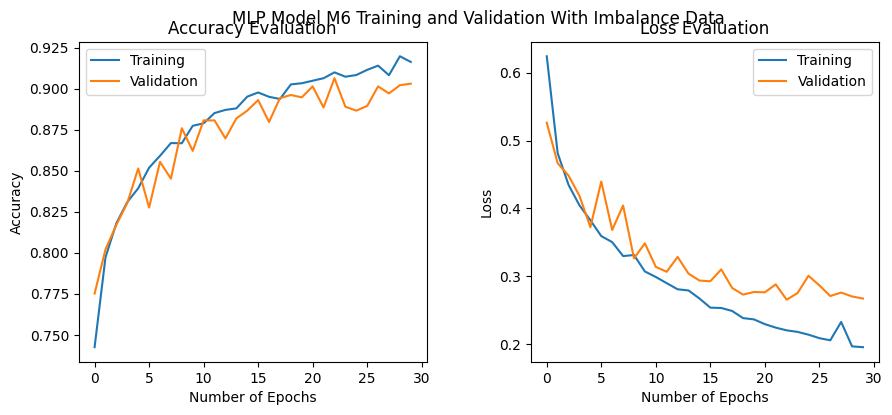

In [38]:
#Plots of MLP Training and Validation Before Dataset Balancing
accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs  = range(len(accuracy))
#fig = plt.figure() 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
#fig, axes = plt.subplots(nrows = 6, ncols = 4, figsize=(15,12)) #, sharex=True, sharey = True)
fig.suptitle('MLP Model M{} Training and Validation With Imbalance Data'.format(num_model))
ax1.plot(epochs, accuracy, label='Training')  
ax1.plot(epochs, val_accuracy, label='Validation')
ax1.set(xlabel='Number of Epochs', ylabel='Accuracy')
ax1.set_title('Accuracy Evaluation')
ax1.legend()
ax2.plot(epochs, loss,label='Training')
ax2.plot(epochs, val_loss,label='Validation')
ax2.legend()
ax2.set(xlabel='Number of Epochs', ylabel='Loss')
ax2.set_title('Loss Evaluation')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=1.0)
plt.show()

In [39]:
#Alternative estimation of the mean accuracy 
cvs = []
ev = modelMLP.evaluate(X_test_scaled, y_test, verbose=0)
cvs.append(ev[1] * 100)
ev
print(np.mean(cvs))

89.69520926475525


In [40]:
#Saving the model
modelMLP.save(config.MLP)
model = tf.keras.models.load_model(config.MLP)

/usr/local/lib/python3.8/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
cvs = []
ev = model.evaluate(X_test_scaled, y_test, verbose=0)
cvs.append(ev[1] * 100)
ev
print(np.mean(cvs))

#https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/  CV Scores

89.69520926475525


In [42]:
y_pred = model.predict(X_test_scaled)
y_pred

216/216 [==============================] - 0s 848us/step


array([[1.6253482e-23, 9.9992830e-01, 7.1621020e-05, 9.5238428e-11,
        9.2404408e-19, 5.1544030e-15],
       [5.6743992e-16, 9.7389138e-01, 2.6108121e-02, 4.7522141e-07,
        5.3356169e-13, 1.0730160e-09],
       [3.2513117e-23, 9.9996251e-01, 3.7388931e-05, 1.9154879e-10,
        6.7149059e-19, 5.6568807e-15],
       ...,
       [5.7495470e-07, 1.4339149e-01, 8.4466547e-01, 1.1817253e-02,
        8.0918962e-06, 1.1733674e-04],
       [3.8930924e-12, 6.6133970e-07, 2.4674276e-03, 9.9742931e-01,
        1.0264799e-04, 1.8532207e-08],
       [2.0466987e-12, 9.6922849e-07, 1.3633593e-03, 9.9853432e-01,
        1.0133538e-04, 1.4147248e-08]], dtype=float32)

In [43]:
#accuracy_score(y_test, y_pred, normalize=False)

In [44]:
#model_history.history

In [45]:
#import Keras.Backend.argmax()
#import numpy as np
best_model_accuracy = model_history.history['accuracy'][np.argmin(model_history.history['loss'])]
best_model_accuracy


0.9162496328353882

In [46]:
best_model_val_accuracy = model_history.history['val_accuracy'][np.argmin(model_history.history['val_loss'])]
best_model_val_accuracy

0.9063616991043091

In [47]:
#import numpy as np
print("accuracy: ", np.mean(np.array(accuracy)))
print("val accuracy: ", np.mean(np.array(val_accuracy)))
print("loss: ", np.mean(np.array(loss)))
print("val loss: ", np.mean(np.array(val_loss)))
print("###")
print("best_model_accuracy ",best_model_accuracy )
print("best_model_val_accuracy ",best_model_val_accuracy )


accuracy:  0.8793960511684418
val accuracy:  0.8721150020758311
loss:  0.2934987753629684
val loss:  0.32947698632876077
###
best_model_accuracy  0.9162496328353882
best_model_val_accuracy  0.9063616991043091


In [48]:
# demonstration of calculating metrics for a neural network model using sklearn
# predict on test set
ann_pred = model.predict(X_test)

# predict crisp classes for test set (reduce 2D (actual+predicted) to 1D
yhat_classes = np.argmax(ann_pred,axis=1) #model.predict_classes(X_test, verbose=0)


# reduce to 1d array
yhat_probs = ann_pred[:, 0]

accuracy = accuracy_score(y_test, yhat_classes)

precision = precision_score(y_test, yhat_classes, average='weighted')

recall = recall_score(y_test, yhat_classes, average='weighted')

f1 = f1_score(y_test, yhat_classes, average='weighted')

#kappa = cohen_kappa_score(y_test, yhat_classes)
#print('Cohens kappa: %f' % kappa)


matrix = confusion_matrix(y_test, yhat_classes)
classification_reportRF = classification_report(y_test, yhat_classes)

#print(matrix)
print("Evaluating ANN \n Confusion Matrix: \n{}\nClassificationReport:\n{}\n Random Forest\n Accuracy={} \n Precision ={} \n F1 Score={} \n Recall={}".format(matrix,classification_reportRF,accuracy,precision,f1,recall))



216/216 [==============================] - 0s 849us/step
Evaluating ANN 
 Confusion Matrix: 
[[2860  156    7    0    0]
 [ 159 1662  139    0    0]
 [   2  191 1600    7    0]
 [   0    0   27   46    0]
 [   0    0    2   20   12]]
ClassificationReport:
              precision    recall  f1-score   support

           1       0.95      0.95      0.95      3023
           2       0.83      0.85      0.84      1960
           3       0.90      0.89      0.90      1800
           4       0.63      0.63      0.63        73
           5       1.00      0.35      0.52        34

    accuracy                           0.90      6890
   macro avg       0.86      0.73      0.77      6890
weighted avg       0.90      0.90      0.90      6890

 Random Forest
 Accuracy=0.8969521044992743 
 Precision =0.8978072625078343 
 F1 Score=0.8965683332688267 
 Recall=0.8969521044992743


In [49]:
#https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

In [50]:
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLP_Acc'] = accuracy
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLP_Prec'] = precision
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLP_F1'] = f1
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLP_Recall'] = recall
#df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLP_Remarks'] = var_remarks_MLP


In [51]:
print(var_remarks_MLP)

Architecture:Model 6: 10-6 Dropout None, Loss function: sparse_categorical_crossentropy, Optimizer: ADAM


**(b) Model Building after Treating Data Imbalancies**

**Treatment of Data Imbalances**

#### Upsampling

In [52]:
#before 
factors.XX_MLA_CLASS2.value_counts()
"""
1    9100
2    6016
3    5449
4     197
5     116
"""


'\n1    9100\n2    6016\n3    5449\n4     197\n5     116\n'

In [53]:
# concatenate our training data back together
#y_train = Y
X_traind = pd.DataFrame(scaled_X)
y_traind = pd.DataFrame(Y)
X = pd.concat([X_traind, y_traind], axis=1)

# separate minority and majority classes
one = X[X.XX_MLA_CLASS2==1]
two = X[X.XX_MLA_CLASS2==2]
three = X[X.XX_MLA_CLASS2==3]
four = X[X.XX_MLA_CLASS2==4]
five = X[X.XX_MLA_CLASS2==5]


# upsample minority
from sklearn.utils import resample
two_upsampled = resample(two,
                          replace=True, # sample with replacement
                          n_samples=len(one), # match number in majority class
                          random_state=42) # reproducible results
upsampled = pd.concat([one, two_upsampled], axis=0)
three_upsampled = resample(three,
                          replace=True, # sample with replacement
                          n_samples=len(one), # match number in majority class
                          random_state=42) # reproducible results
upsampled = pd.concat([upsampled, three_upsampled], axis=0)
four_upsampled = resample(four,
                          replace=True, # sample with replacement
                          n_samples=len(one), # match number in majority class
                          random_state=42) # reproducible results
upsampled = pd.concat([upsampled, four_upsampled], axis=0)
five_upsampled = resample(five,
                          replace=True, # sample with replacement
                          n_samples=len(one), # match number in majority class
                          random_state=42) # reproducible results
upsampled = pd.concat([upsampled, five_upsampled], axis=0)
# combine majority and upsampled minority
#upsampled = pd.concat([one, two_upsampled, three_upsampled, four_upsampled, five_upsampled])

# check new class counts
upsampled.XX_MLA_CLASS2.value_counts()



1    9100
2    9100
3    9100
4    9100
5    9100
Name: XX_MLA_CLASS2, dtype: int64

In [54]:
#Upscale BM

X_traind_bm = pd.DataFrame(scaled_X_bm)
y_traind_bm = pd.DataFrame(Y)
X_bm = pd.concat([X_traind_bm, y_traind_bm], axis=1)

# separate minority and majority classes
one_bm = X_bm[X_bm.XX_MLA_CLASS2==1]
two_bm = X_bm[X_bm.XX_MLA_CLASS2==2]
three_bm = X_bm[X_bm.XX_MLA_CLASS2==3]
four_bm = X_bm[X_bm.XX_MLA_CLASS2==4]
five_bm = X_bm[X_bm.XX_MLA_CLASS2==5]


# upsample minority
#from sklearn.utils import resample
two_upsampled_bm = resample(two_bm,
                          replace=True, # sample with replacement
                          n_samples=len(one_bm), # match number in majority class
                          random_state=42) # reproducible results
upsampled_bm = pd.concat([one_bm, two_upsampled_bm], axis=0)
three_upsampled_bm = resample(three,
                          replace=True, # sample with replacement
                          n_samples=len(one_bm), # match number in majority class
                          random_state=42) # reproducible results
upsampled_bm = pd.concat([upsampled_bm, three_upsampled_bm], axis=0)
four_upsampled_bm = resample(four,
                          replace=True, # sample with replacement
                          n_samples=len(one_bm), # match number in majority class
                          random_state=42) # reproducible results
upsampled_bm = pd.concat([upsampled_bm, four_upsampled_bm], axis=0)
five_upsampled_bm = resample(five,
                          replace=True, # sample with replacement
                          n_samples=len(one_bm), # match number in majority class
                          random_state=42) # reproducible results
upsampled_bm = pd.concat([upsampled_bm, five_upsampled_bm], axis=0)
# combine majority and upsampled minority
#upsampled = pd.concat([one, two_upsampled, three_upsampled, four_upsampled, five_upsampled])

# check new class counts
upsampled_bm.XX_MLA_CLASS2.value_counts()



1    9100
2    9100
3    9100
4    9100
5    9100
Name: XX_MLA_CLASS2, dtype: int64

In [55]:
upsampled_bm.head()

,REPORTINGDATE,INSTITUTIONCODE,BANKSIZE,LR,EWAQ_NPLsNetOfProvisions,EWAQ_NPLsNetOfProvisions2CoreCapital,EWAQ_NPL,ExcessShortTLiab2LongTAsset,CD_TO_TOTAL_ASSET,LIQASSET2TOTALASSET,LIQASSET2DEPOSIT,TOTAL_DEPOSITS,XX_MLA_CLASS2
0,2010-02-05,B5014,11.137502,14.634353,44468.326344,0.000003,8.063249e+08,-0.065458,0.451251,0.537186,1.059766,6.956926e+10,1
1,2010-02-12,B5014,11.129058,14.635804,59291.101792,0.000004,8.206735e+08,-0.096342,0.447671,0.547733,1.086425,6.786213e+10,1
2,2010-02-19,B5014,11.125597,14.640078,51879.714068,0.000004,8.167797e+08,-0.114094,0.443746,0.552115,1.101995,6.690330e+10,1
3,2010-02-26,B5014,11.126559,14.646235,29645.550896,0.000002,7.985373e+08,-0.102229,0.444068,0.550894,1.090917,6.758268e+10,1
4,2010-03-05,B5014,11.138860,14.660432,-29645.550896,-0.000002,7.345822e+08,-0.026119,0.464603,0.535509,1.023180,7.205682e+10,1


In [56]:
scaled_X.shape

(20878, 10)

In [57]:
scaled_X_bm.shape

(20878, 12)

**Redo Data Spliting into Train and Test datasets**

In [58]:
#Split and again 
# Separate input features and target

YUS = upsampled.XX_MLA_CLASS2
scaled_XUS = upsampled.drop('XX_MLA_CLASS2', axis=1)


# setting up testing and training sets
X_trainUS, X_testUS, y_trainUS, y_testUS = train_test_split(scaled_XUS.values, YUS, test_size=0.33, random_state=42)



In [59]:
#split benchmark
YUS_bm = upsampled_bm.XX_MLA_CLASS2
scaled_XUS_bm = upsampled_bm.drop('XX_MLA_CLASS2', axis=1)

X_trainUS_bm, X_testUS_bm, y_trainUS_bm, y_testUS_bm = train_test_split(scaled_XUS_bm.values,YUS_bm,test_size=0.33,random_state=42)

In [60]:
y_testUS

10884    2
11763    4
11836    5
6256     1
10511    1
        ..
11860    5
6940     1
11722    4
14327    2
1718     2
Name: XX_MLA_CLASS2, Length: 15015, dtype: int64

In [61]:
y_testUS_bm

10884    2
11763    4
11836    5
6256     1
10511    1
        ..
11860    5
6940     1
11722    4
14327    2
1718     2
Name: XX_MLA_CLASS2, Length: 15015, dtype: int64

In [62]:
#upsampled_bm.iloc[:,2:]

In [63]:
#tests
# result = X_trainUS[:,:] == X_trainUS_bm[:,2:]
# print(result)
# result = X_testUS[:,:] == X_testUS_bm[:,2:]
# print(result)
# result = y_trainUS == y_trainUS_bm
# print(result)
# result = y_testUS == y_testUS_bm
# print(result)

In [64]:
y_testUS_bm.shape

(15015,)

In [65]:
X_trainUS

array([[1.03996830e+01, 1.46850348e+01, 9.96063285e+07, ...,
        6.19293851e-01, 1.01696295e+00, 1.52853234e+10],
       [1.21614056e+01, 1.58228737e+01, 7.11172124e+10, ...,
        3.70437061e-01, 5.48815225e-01, 9.81810121e+11],
       [1.16484976e+01, 1.58200000e+01, 1.77603501e+09, ...,
        1.59635612e-01, 4.20176360e-01, 1.69120309e+11],
       ...,
       [1.18435714e+01, 1.74085715e+01, 7.09663402e+10, ...,
        1.22613456e-01, 3.26833477e-01, 2.61687495e+11],
       [1.09656537e+01, 1.43915404e+01, 9.20708872e+08, ...,
        3.62159065e-01, 5.09259869e-01, 7.36374772e+10],
       [1.12864337e+01, 1.63553743e+01, 7.21862914e+09, ...,
        3.51689055e-01, 8.70362596e-01, 7.81433981e+10]])

**Redo Data Scaling**

In [66]:
#from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_trainUS=sc.fit_transform(X_trainUS)
X_testUS=sc.transform(X_testUS)

In [67]:
X_trainUS_bm_scaled=sc.fit_transform(X_trainUS_bm[:,2:])
X_testUS_bm_scaled=sc.transform(X_testUS_bm[:,2:])

In [68]:
# Concatenate the first two columns from the original arrays with the scaled arrays
X_trainUS_bm2 = np.hstack((X_trainUS_bm[:, :2], X_trainUS_bm_scaled))
X_testUS_bm2 = np.hstack((X_testUS_bm[:, :2], X_testUS_bm_scaled))

In [69]:
np.isnan(y_testUS)

10884    False
11763    False
11836    False
6256     False
10511    False
         ...  
11860    False
6940     False
11722    False
14327    False
1718     False
Name: XX_MLA_CLASS2, Length: 15015, dtype: bool

In [70]:
X_trainUS

array([[-2.55316055, -2.21095965, -0.76725161, ...,  1.49965332,
        -0.0114348 , -0.55097859],
       [ 0.99214969, -0.84905311, -0.04654044, ...,  0.5141993 ,
        -0.0114348 ,  0.9632512 ],
       [-0.0400321 , -0.85249271, -0.75023863, ..., -0.32055844,
        -0.0114348 , -0.30996923],
       ...,
       [ 0.35253654,  1.04890641, -0.04807154, ..., -0.46716337,
        -0.0114348 , -0.16494658],
       [-1.41419471, -2.56225016, -0.75891878, ...,  0.48141907,
        -0.0114348 , -0.45955975],
       [-0.76865361, -0.21169041, -0.69500531, ...,  0.43995862,
        -0.0114348 , -0.45250044]])

In [71]:
np.sum(np.isnan(y_testUS_bm))

0

In [72]:
#save to file
columns1=['BANKSIZE', 'LR', 'EWAQ_NPLsNetOfProvisions',
       'EWAQ_NPLsNetOfProvisions2CoreCapital', 'EWAQ_NPL',
       'ExcessShortTLiab2LongTAsset', 'CD_TO_TOTAL_ASSET',
       'LIQASSET2TOTALASSET', 'LIQASSET2DEPOSIT', 'TOTAL_DEPOSITS']
columns2=['REPORTINGDATE','INSTITUTIONCODE','BANKSIZE', 'LR', 'EWAQ_NPLsNetOfProvisions',
       'EWAQ_NPLsNetOfProvisions2CoreCapital', 'EWAQ_NPL',
       'ExcessShortTLiab2LongTAsset', 'CD_TO_TOTAL_ASSET',
       'LIQASSET2TOTALASSET', 'LIQASSET2DEPOSIT', 'TOTAL_DEPOSITS']

# Use np.savetxt to save the NumPy array as a CSV file

df_X_testUS = pd.DataFrame(X_testUS,columns=columns1)
df_X_testUS.to_csv(config.X_testUS, index=False)
df_X_testUS = pd.read_csv(config.X_testUS)
df_X_testUS.columns = columns1

df_Y_testUS = pd.DataFrame(y_testUS,columns=['XX_MLA_CLASS2'])
df_Y_testUS.to_csv(config.Y_testUS, index=False)
df_Y_testUS = pd.read_csv(config.Y_testUS)
df_Y_testUS.columns = ['XX_MLA_CLASS2']

# Use np.savetxt to save the NumPy array as a CSV file

df_X_testUS_bm2 = pd.DataFrame(X_testUS_bm2,columns=columns2)
df_X_testUS_bm2.to_csv(config.X_testUS_bm2, index=False)
df_X_testUS_bm2 = pd.read_csv(config.X_testUS_bm2)
df_X_testUS_bm2.columns = columns2

df_Y_testUS_bm2 = pd.DataFrame(y_testUS_bm,columns=['XX_MLA_CLASS2'])
df_Y_testUS_bm2.to_csv(config.Y_testUS_bm, index=False)
df_Y_testUS_bm2 = pd.read_csv(config.Y_testUS_bm)
df_Y_testUS_bm2.columns = ['XX_MLA_CLASS2']



In [73]:
y_testUS.head()

10884    2
11763    4
11836    5
6256     1
10511    1
Name: XX_MLA_CLASS2, dtype: int64

In [74]:
type(df_Y_testUS)

pandas.core.frame.DataFrame

In [75]:
X_testUS

array([[ 1.15408633, -0.50155682, -0.4133626 , ...,  0.68941354,
        -0.0114348 ,  0.19867845],
       [ 0.76648552,  0.28182362,  1.47275479, ..., -0.61791865,
        -0.0114348 , -0.07446734],
       [ 0.7754604 ,  0.18451356,  1.7274715 , ..., -0.73548122,
        -0.0114348 ,  0.03969977],
       ...,
       [ 0.7954516 ,  0.43973583,  1.67085083, ..., -0.53593992,
        -0.0114348 , -0.10087279],
       [-0.57614697,  0.57397885, -0.20617018, ...,  0.43979364,
        -0.0114348 , -0.48655915],
       [-0.95615527,  1.74406013, -0.67325875, ...,  0.10571705,
        -0.0114348 , -0.40879904]])

In [76]:
df_y_testUS = pd.DataFrame(y_testUS, columns=['XX_MLA_CLASS2'])
df_y_testUS.sort_index()

,XX_MLA_CLASS2
0,1
1,1
4,1
6,1
7,1
...,...
20862,1
20864,1
20865,1
20871,1


In [77]:
df_X_testUS

,BANKSIZE,LR,EWAQ_NPLsNetOfProvisions,EWAQ_NPLsNetOfProvisions2CoreCapital,EWAQ_NPL,ExcessShortTLiab2LongTAsset,CD_TO_TOTAL_ASSET,LIQASSET2TOTALASSET,LIQASSET2DEPOSIT,TOTAL_DEPOSITS
0,1.154086,-0.501557,-0.413363,-0.116690,-0.388823,-0.228397,-0.128209,0.689414,-0.011435,0.198678
1,0.766486,0.281824,1.472755,-0.089521,1.622116,0.021179,-0.581599,-0.617919,-0.011435,-0.074467
2,0.775460,0.184514,1.727471,-0.087094,1.882613,0.071434,-0.459371,-0.735481,-0.011435,0.039700
3,-1.238104,1.527523,-0.703836,-0.111406,-0.721601,-0.380212,-0.765913,1.063540,-0.011435,-0.526334
4,0.238661,-0.010650,0.263193,-0.082750,0.552617,0.002379,-0.100279,0.421840,-0.011435,-0.125650
...,...,...,...,...,...,...,...,...,...,...
15010,0.810289,-0.177204,1.409034,-0.091895,1.606002,0.071716,-0.549042,-0.657968,-0.011435,0.090511
15011,-0.106960,1.426208,-0.343692,-0.098138,-0.392922,0.057141,0.084883,0.557514,-0.011435,-0.214800
15012,0.795452,0.439736,1.670851,-0.084162,1.517931,-0.003914,-0.396499,-0.535940,-0.011435,-0.100873
15013,-0.576147,0.573979,-0.206170,0.009603,-0.153401,-0.203590,-0.751985,0.439794,-0.011435,-0.486559


In [78]:
#merge testing data
test_data = df_X_testUS
test_data['Y'] = df_Y_testUS['XX_MLA_CLASS2']
test_data

,BANKSIZE,LR,EWAQ_NPLsNetOfProvisions,EWAQ_NPLsNetOfProvisions2CoreCapital,EWAQ_NPL,ExcessShortTLiab2LongTAsset,CD_TO_TOTAL_ASSET,LIQASSET2TOTALASSET,LIQASSET2DEPOSIT,TOTAL_DEPOSITS,Y
0,1.154086,-0.501557,-0.413363,-0.116690,-0.388823,-0.228397,-0.128209,0.689414,-0.011435,0.198678,2
1,0.766486,0.281824,1.472755,-0.089521,1.622116,0.021179,-0.581599,-0.617919,-0.011435,-0.074467,4
2,0.775460,0.184514,1.727471,-0.087094,1.882613,0.071434,-0.459371,-0.735481,-0.011435,0.039700,5
3,-1.238104,1.527523,-0.703836,-0.111406,-0.721601,-0.380212,-0.765913,1.063540,-0.011435,-0.526334,1
4,0.238661,-0.010650,0.263193,-0.082750,0.552617,0.002379,-0.100279,0.421840,-0.011435,-0.125650,1
...,...,...,...,...,...,...,...,...,...,...,...
15010,0.810289,-0.177204,1.409034,-0.091895,1.606002,0.071716,-0.549042,-0.657968,-0.011435,0.090511,5
15011,-0.106960,1.426208,-0.343692,-0.098138,-0.392922,0.057141,0.084883,0.557514,-0.011435,-0.214800,1
15012,0.795452,0.439736,1.670851,-0.084162,1.517931,-0.003914,-0.396499,-0.535940,-0.011435,-0.100873,4
15013,-0.576147,0.573979,-0.206170,0.009603,-0.153401,-0.203590,-0.751985,0.439794,-0.011435,-0.486559,2


In [79]:
#merge practical benchmarking data
benchmark_data = df_X_testUS_bm2
benchmark_data['Y'] = df_Y_testUS_bm2['XX_MLA_CLASS2']
benchmark_data 

,REPORTINGDATE,INSTITUTIONCODE,BANKSIZE,LR,EWAQ_NPLsNetOfProvisions,EWAQ_NPLsNetOfProvisions2CoreCapital,EWAQ_NPL,ExcessShortTLiab2LongTAsset,CD_TO_TOTAL_ASSET,LIQASSET2TOTALASSET,LIQASSET2DEPOSIT,TOTAL_DEPOSITS,Y
0,2015-06-26,B5512,1.154086,-0.501557,-0.413363,-0.116690,-0.388823,-0.228397,-0.128209,0.689414,-0.011435,0.198678,2
1,NaN,NaN,0.766486,0.281824,1.472755,-0.089521,1.622116,0.021179,-0.581599,-0.617919,-0.011435,-0.074467,4
2,NaN,NaN,0.775460,0.184514,1.727471,-0.087094,1.882613,0.071434,-0.459371,-0.735481,-0.011435,0.039700,5
3,2017-07-28,B5215,-1.238104,1.527523,-0.703836,-0.111406,-0.721601,-0.380212,-0.765913,1.063540,-0.011435,-0.526334,1
4,2020-06-26,B5418,0.238661,-0.010650,0.263193,-0.082750,0.552617,0.002379,-0.100279,0.421840,-0.011435,-0.125650,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15010,NaN,NaN,0.810289,-0.177204,1.409034,-0.091895,1.606002,0.071716,-0.549042,-0.657968,-0.011435,0.090511,5
15011,2018-05-18,B5216,-0.106960,1.426208,-0.343692,-0.098138,-0.392922,0.057141,0.084883,0.557514,-0.011435,-0.214800,1
15012,NaN,NaN,0.795452,0.439736,1.670851,-0.084162,1.517931,-0.003914,-0.396499,-0.535940,-0.011435,-0.100873,4
15013,2019-04-26,B5717,-0.576147,0.573979,-0.206170,0.009603,-0.153401,-0.203590,-0.751985,0.439794,-0.011435,-0.486559,2


<!-- #### Logistic Regression After Treating Data Imbalances -->

#### Random Forest After Treating Data Imbalances

In [80]:
#num_estimators = 199

# train model
rfcUS = RandomForestClassifier(n_estimators=num_estimators).fit(X_trainUS, y_trainUS)

# save the model to disk
rfcUS_filename = config.rfcUS
with open(rfcUS_filename, 'wb') as rfcUS_file:
    pickle.dump(rfcUS, rfcUS_file)

# load the model from disk
with open(rfcUS_filename, 'rb') as rfcUS_file:
    rfcUS = pickle.load(rfcUS_file)

# predict on test set
rfcUS_pred = rfcUS.predict(X_testUS)

rfcUS_accuracy = accuracy_score(y_testUS, rfcUS_pred)

rfcUS_precision = precision_score(y_testUS, rfcUS_pred,average='weighted')

rfcUS_f1_score = f1_score(y_testUS, rfcUS_pred,average='weighted')

rfcUS_recall = recall_score(y_testUS, rfcUS_pred,average='weighted')



#### MLP ANN After Treating Data Imbalances

In [81]:
#selection of MLP model and parameters for training and testing
# modelMLPUS = MLP_model_M6  #.95 accuracy
# number_of_neurons = neurons_M6
modelMLPUS = model_selection   
number_of_neurons = num_neurons


#model architecture
arch = "10-"
for i in range(len(number_of_neurons)):
    arch = "{}{}-".format(arch,str(number_of_neurons[i]))
arch = arch + str("6")


dropout = 'None'
if num_model == 1:
    model_selection = MLP_model_M1   
    num_neurons = neurons_M1 
    optimization_function = 'sgd'   #adam or SGD etc
if num_model == 2:
    model_selection = MLP_model_M2   
    num_neurons = neurons_M2
    optimization_function = 'sgd'   #adam or SGD etc
if num_model == 3:
    model_selection = MLP_model_M3   
    num_neurons = neurons_M3
    optimization_function = 'sgd'   #adam or SGD etc
if num_model == 4:
    model_selection = MLP_model_M4   
    num_neurons = neurons_M4
    optimization_function = 'sgd'   #adam or SGD etc
if num_model == 5:
    model_selection = MLP_model_M5   
    num_neurons = neurons_M5 
    optimization_function = 'sgd'   #adam or SGD etc
if num_model == 6:
    model_selection = MLP_model_M6   
    num_neurons = neurons_M6 
    optimization_function = 'adam'   #adam or SGD etc    
if num_model == 7:
    model_selection = MLP_model_M7   
    num_neurons = neurons_M7
    optimization_function = 'adam'   #adam or SGD etc  
if num_model == 8:
    model_selection = MLP_model_M8   
    num_neurons = neurons_M8 
    optimization_function = 'adam'   #adam or SGD etc  
    dropout = '0.2'
if num_model == 9:
    model_selection = MLP_model_M9   
    num_neurons = neurons_M9 
    optimization_function = 'adam'   #adam or SGD etc 
var_optimizer = optimization_function
var_loss = loss_function
var_arch = 'Model M{}: {} Dropout {}'.format(num_model,arch,dropout)
var_epochs = number_of_epochs
var_validation_split = training_validation_split

var_remarks_MLP = 'MLP Architecture:{}, Loss:{}, Optimizer:{}, epochs:{}, validation_split:{}'.format(var_arch, 
                                                                                   var_loss,
                                                                                   var_optimizer.upper(),
                                                                                   str(var_epochs),
                                                                                   str(var_validation_split))


modelMLPUS.compile(loss = var_loss,optimizer = var_optimizer,metrics = ['accuracy'])

In [82]:
%%time
#Model training and validation 
t0 = tm.time()
modelMLP_history = modelMLPUS.fit(X_trainUS, y_trainUS,validation_split=var_validation_split,epochs = var_epochs)
training_timeUS  = tm.time()-t0   

Epoch 1/30
667/667 [==============================] - 2s 3ms/step - loss: 0.4477 - accuracy: 0.8343 - val_loss: 0.3588 - val_accuracy: 0.8584
Epoch 2/30
667/667 [==============================] - 1s 2ms/step - loss: 0.2691 - accuracy: 0.8918 - val_loss: 0.2399 - val_accuracy: 0.9033
Epoch 3/30
667/667 [==============================] - 1s 2ms/step - loss: 0.2413 - accuracy: 0.9049 - val_loss: 0.2592 - val_accuracy: 0.8947
Epoch 4/30
667/667 [==============================] - 1s 2ms/step - loss: 0.2251 - accuracy: 0.9098 - val_loss: 0.2023 - val_accuracy: 0.9196
Epoch 5/30
667/667 [==============================] - 1s 2ms/step - loss: 0.2196 - accuracy: 0.9124 - val_loss: 0.1985 - val_accuracy: 0.9166
Epoch 6/30
667/667 [==============================] - 1s 2ms/step - loss: 0.2032 - accuracy: 0.9186 - val_loss: 0.1830 - val_accuracy: 0.9262
Epoch 7/30
667/667 [==============================] - 1s 2ms/step - loss: 0.1992 - accuracy: 0.9172 - val_loss: 0.1877 - val_accuracy: 0.9259
Epoch 

In [83]:
modelMLPUS.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 10)                0         
                                                                 
 dense_21 (Dense)            (None, 512)               5632      
                                                                 
 dense_22 (Dense)            (None, 250)               128250    
                                                                 
 dense_23 (Dense)            (None, 120)               30120     
                                                                 
 dense_24 (Dense)            (None, 80)                9680      
                                                                 
 dense_25 (Dense)            (None, 60)                4860      
                                                                 
 dense_26 (Dense)            (None, 6)                

In [84]:
modelMLPUS.save(config.MLPUS)
modelMLPUS = tf.keras.models.load_model(config.MLPUS)

/usr/local/lib/python3.8/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


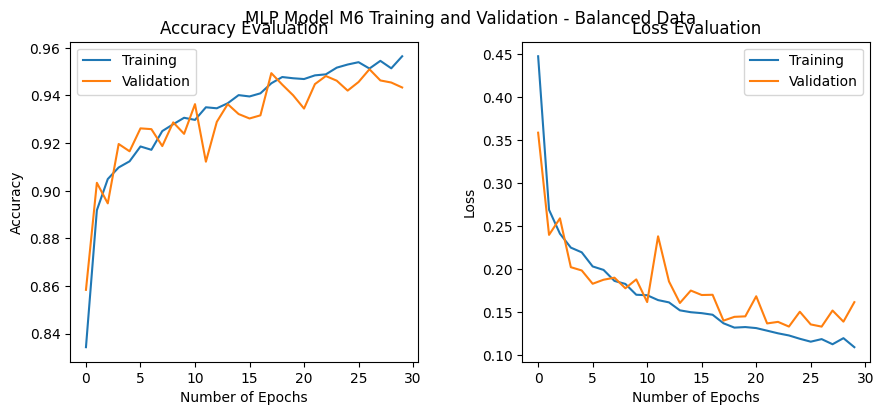

In [85]:
#Plots of MLP Training and Validation Before Dataset Balancing
accuracyUS = modelMLP_history.history['accuracy']
val_accuracyUS = modelMLP_history.history['val_accuracy']
lossUS = modelMLP_history.history['loss']
val_lossUS = modelMLP_history.history['val_loss']
epochsUS  = range(len(accuracyUS))
#fig = plt.figure() 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
#fig, axes = plt.subplots(nrows = 6, ncols = 4, figsize=(15,12)) #, sharex=True, sharey = True)
fig.suptitle('MLP Model M{} Training and Validation - Balanced Data'.format(num_model))
ax1.plot(epochsUS, accuracyUS, label='Training')  
ax1.plot(epochsUS, val_accuracyUS, label='Validation')
ax1.set(xlabel='Number of Epochs', ylabel='Accuracy')
ax1.set_title('Accuracy Evaluation')
ax1.legend()
ax2.plot(epochsUS, lossUS,label='Training')
ax2.plot(epochsUS, val_lossUS,label='Validation')
ax2.legend()
ax2.set(xlabel='Number of Epochs', ylabel='Loss')
ax2.set_title('Loss Evaluation')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=1.0)
plt.show()

In [86]:
#Evaluating MLP M6 Training and Validation after Upsampling
best_model_accuracy = modelMLP_history.history['accuracy'][np.argmin(modelMLP_history.history['loss'])]
best_model_val_accuracy = modelMLP_history.history['val_accuracy'][np.argmin(modelMLP_history.history['val_loss'])]
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_BestTrAcc'] = best_model_accuracy
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_BestValAcc'] = best_model_val_accuracy
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_TrAcc'] = np.mean(np.array(accuracyUS))
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_TrLoss'] = np.mean(np.array(lossUS))
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_ValAcc'] = np.mean(np.array(val_accuracyUS))
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_ValLoss'] = np.mean(np.array(val_lossUS))
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_TrTime'] = training_time



print("Best Training accuracy: {} \n"
      "Best Training validation accuracy: {} \n"
      "Mean Training accuracy: {} \n"
      "Mean Training validation accuracy: {} \n"
      "Mean Training loss: {} \n"
      "Mean Training validation loss: {}\n"
      "Training time: {} seconds"
      .format(best_model_accuracy,
              best_model_val_accuracy,
              np.mean(np.array(accuracy)),
              np.mean(np.array(val_accuracy)),
              np.mean(np.array(loss)),
              np.mean(np.array(val_loss)),
              training_time
             ))

Best Training accuracy: 0.9564647078514099 
Best Training validation accuracy: 0.9510168433189392 
Mean Training accuracy: 0.8969521044992743 
Mean Training validation accuracy: 0.8721150020758311 
Mean Training loss: 0.2934987753629684 
Mean Training validation loss: 0.32947698632876077
Training time: 20.806583166122437 seconds


In [87]:
# predict on test set
ann_pred = modelMLPUS.predict(X_testUS)

# predict crisp classes for test set (reduce 2D (actual+predicted) to 1D
yhat_classes = np.argmax(ann_pred,axis=1) #model.predict_classes(X_test, verbose=0)


# reduce to 1d array
yhat_probs = ann_pred[:, 0]

MLPUS_accuracy = accuracy_score(y_testUS, yhat_classes)

MLPUS_precision = precision_score(y_testUS, yhat_classes, average='weighted')

MLPUS_recall = recall_score(y_testUS, yhat_classes, average='weighted')

MLPUS_f1 = f1_score(y_testUS, yhat_classes, average='weighted')

# confusion matrix
matrix = confusion_matrix(y_testUS, yhat_classes)



470/470 [==============================] - 0s 837us/step


#### Hybrid RF-MLP Model

In [88]:
y_testUSF = y_testUS.to_numpy().reshape(15015,)
y_testUSF.shape

(15015,)

In [89]:
# HML = pd.DataFrame()
# if ((str(num_estimators) == str(199)) and (modelMLPUS == MLP_model_M6)):
HML = pd.DataFrame({'Y': y_testUSF, 'RF': rfcUS_pred, 'MLP': yhat_classes}, columns=['Y','RF','MLP'])
HML['HML']=HML.apply(lambda x: x.RF if x.RF>x.MLP else x.MLP,axis=1 )
# else:
#     HML = pd.DataFrame()

HML.head()

,Y,RF,MLP,HML
0,2,2,2,2
1,4,4,4,4
2,5,5,5,5
3,1,1,1,1
4,1,1,1,1


In [90]:

HML.head()

,Y,RF,MLP,HML
0,2,2,2,2
1,4,4,4,4
2,5,5,5,5
3,1,1,1,1
4,1,1,1,1


In [91]:
y_hml=HML['HML'].to_numpy().reshape(15015,)
y_hml

array([2, 4, 5, ..., 4, 3, 2])

In [92]:
hml_accuracy = accuracy_score(y_testUS, y_hml)

hml_precision = precision_score(y_testUS, y_hml,average='weighted')
#0.9995
hml_f1_score = f1_score(y_testUS, y_hml,average='weighted')
#0.8666
hml_recall = recall_score(y_testUS, y_hml,average='weighted')



### Models Performance Test Results

#### Accuracy, Precision, F1 Score, Recall

In [93]:
#Evaluating RF results
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'RFUS_Acc'] = rfcUS_accuracy
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'RFUS_Prec'] = rfcUS_precision
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'RFUS_F1'] = rfcUS_f1_score
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'RFUS_Recall'] = rfcUS_recall
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'RF_Remarks'] = '{} estimators'.format(num_estimators)



matrix = confusion_matrix(y_testUS,rfcUS_pred)
classification_report_RFUS = classification_report(y_testUS,rfcUS_pred)
#print results
print("Evaluating Random Forest R2 with {} Estimators\n Confusion Matrix:\n{}\n ClassificationReport:\n{}\n Random Forest Accuracy={} \n Precision ={} \n F1 Score={} \nRecall={}".format(str(num_estimators),matrix,
                                                                                                                    classification_report_RFUS,
                                                                                                                    rfcUS_accuracy,rfcUS_precision,rfcUS_f1_score,rfcUS_recall))





Evaluating Random Forest R2 with 199 Estimators
 Confusion Matrix:
[[2981  109    2    0    0]
 [  60 2828   44    0    0]
 [   4   57 2924    1    2]
 [   0    0    0 3009    0]
 [   0    0    0    0 2994]]
 ClassificationReport:
              precision    recall  f1-score   support

           1       0.98      0.96      0.97      3092
           2       0.94      0.96      0.95      2932
           3       0.98      0.98      0.98      2988
           4       1.00      1.00      1.00      3009
           5       1.00      1.00      1.00      2994

    accuracy                           0.98     15015
   macro avg       0.98      0.98      0.98     15015
weighted avg       0.98      0.98      0.98     15015

 Random Forest Accuracy=0.9814185814185814 
 Precision =0.9815632748769965 
 F1 Score=0.9814569802178585 
Recall=0.9814185814185814


In [94]:
#MLP Results
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_Acc'] = MLPUS_accuracy
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_Prec'] = MLPUS_precision
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_F1'] = MLPUS_f1
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_Recall'] = MLPUS_recall
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_Remarks'] = var_remarks_MLP 


print("Evaluating ANN \n Confusion Matrix: \n{}\n ClassificationReport:\n{}\n MLP ANN Accuracy={} \n Precision ={} \n F1 Score={} \nRecall={}".format(matrix,classification_report(y_testUS,yhat_classes),MLPUS_accuracy,MLPUS_precision,MLPUS_f1,MLPUS_recall))



Evaluating ANN 
 Confusion Matrix: 
[[2981  109    2    0    0]
 [  60 2828   44    0    0]
 [   4   57 2924    1    2]
 [   0    0    0 3009    0]
 [   0    0    0    0 2994]]
 ClassificationReport:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95      3092
           2       0.90      0.89      0.89      2932
           3       0.92      0.94      0.93      2988
           4       0.93      1.00      0.96      3009
           5       1.00      0.93      0.97      2994

    accuracy                           0.94     15015
   macro avg       0.94      0.94      0.94     15015
weighted avg       0.94      0.94      0.94     15015

 MLP ANN Accuracy=0.9412587412587412 
 Precision =0.9423122248950251 
 F1 Score=0.9412464022903851 
Recall=0.9412587412587412


In [95]:
#Hybrid RF-MLP
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'HMLUS_Acc'] = hml_accuracy 
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'HMLUS_Prec'] = hml_precision
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'HMLUS_F1'] = hml_f1_score
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'HMLUS_Recall'] = hml_recall
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'HMLUS_Remarks'] = "Hybrid of R2(RF) and M6(MLP) Models" 

print("Hybrid Machine Learning \n Confusion Matrix:\n{}\n ClassificationReport:\n{}\n Hybrid ML Accuracy={} \n Precision ={} \n F1 Score={} \nRecall={}".format(confusion_matrix(y_testUS,y_hml),
                                                                                                                     classification_report(y_testUS,y_hml),
                                                                                                                     hml_accuracy,hml_precision,hml_f1_score,hml_recall))





Hybrid Machine Learning 
 Confusion Matrix:
[[2876  205   11    0    0]
 [  33 2665  234    0    0]
 [   3   32 2920   31    2]
 [   0    0    0 3009    0]
 [   0    0    0    0 2994]]
 ClassificationReport:
              precision    recall  f1-score   support

           1       0.99      0.93      0.96      3092
           2       0.92      0.91      0.91      2932
           3       0.92      0.98      0.95      2988
           4       0.99      1.00      0.99      3009
           5       1.00      1.00      1.00      2994

    accuracy                           0.96     15015
   macro avg       0.96      0.96      0.96     15015
weighted avg       0.96      0.96      0.96     15015

 Hybrid ML Accuracy=0.9633033633033633 
 Precision =0.9639256454313165 
 F1 Score=0.9632706217245255 
Recall=0.9633033633033633


#### ROC Curve

In [96]:
# ROC Curve
def roc_auc(y_testUS,yhat_classes, model):
    y_testUS_onehot=label_binarize(y_testUS, classes=[1,2,3,4,5])
    yhat_classes_onehot=label_binarize(yhat_classes, classes=[1,2,3,4,5])
    #y_testUS_onehot.shape
    #y_testUS, yhat_classes
    n_classes = yhat_classes_onehot.shape[1]
    n_classes
    fpr = dict()
    tpr = dict()
    roc_auc= dict()
    lw = 2
    for i in range(n_classes):
        fpr[i], tpr[i],_ = roc_curve(y_testUS_onehot[:,i], yhat_classes_onehot[:,i])
        roc_auc[i]=auc(fpr[i],tpr[i])        
    colors = cycle(['blue','red','green','yellow','purple'])
    #colors = ['blue','red','green','yellow','purple']
    for i,color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i],color=color, lw=2,
                label='ROC curve of class {0} (AUC ={1:0.2f})'.format(i+1,roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for {} model'.format(model))
    plt.legend(loc="lower right")
    plt.show()    

def computeRoc_auc(y_testUS,yhat_classes, model):
    y_testUS_onehot=label_binarize(y_testUS, classes=[1,2,3,4,5])
    yhat_classes_onehot=label_binarize(yhat_classes, classes=[1,2,3,4,5])
    #y_testUS_onehot.shape
    #y_testUS, yhat_classes
    n_classes = yhat_classes_onehot.shape[1]
    n_classes
    fpr = dict()
    tpr = dict()
    roc_auc= dict()
    lw = 2
    for i in range(n_classes):
        fpr[i], tpr[i],_ = roc_curve(y_testUS_onehot[:,i], yhat_classes_onehot[:,i])
         
        if model == 'RF':
            varname = 'RFUS_ROC_Class{}'.format(i+1)
            df_tmp_results.loc[df_tmp_results['sno']==sno_val, varname] = roc_auc[i]=auc(fpr[i],tpr[i])
        elif model == 'MLP':
            varname = 'MLPUS_ROC_Class{}'.format(i+1)
            df_tmp_results.loc[df_tmp_results['sno']==sno_val, varname] = roc_auc[i]=auc(fpr[i],tpr[i])
        elif model == 'HML':
            varname = 'HML_ROC_Class{}'.format(i+1)
            df_tmp_results.loc[df_tmp_results['sno']==sno_val, varname] = roc_auc[i]=auc(fpr[i],tpr[i])
computeRoc_auc(y_testUS,yhat_classes, 'MLP')
computeRoc_auc(y_testUS,rfcUS_pred, 'RF')
computeRoc_auc(y_testUS,y_hml, 'HML')

#y_hml

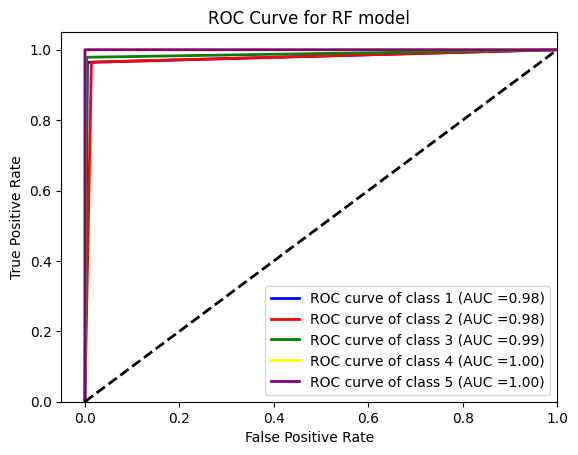

In [97]:
#RF ROC
roc_auc(y_testUS, rfcUS_pred, 'RF') 

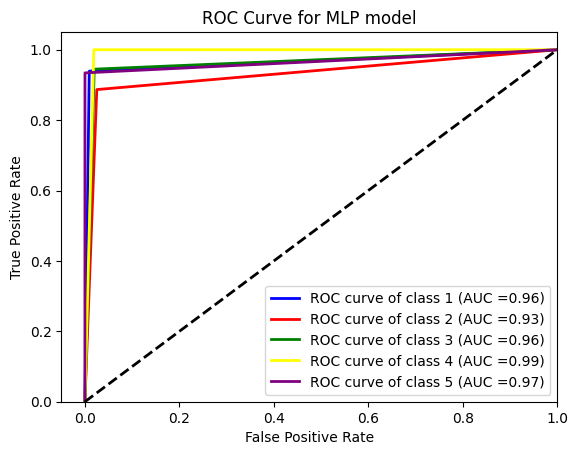

In [98]:
#MLP ROC
roc_auc(y_testUS,yhat_classes, 'MLP')  

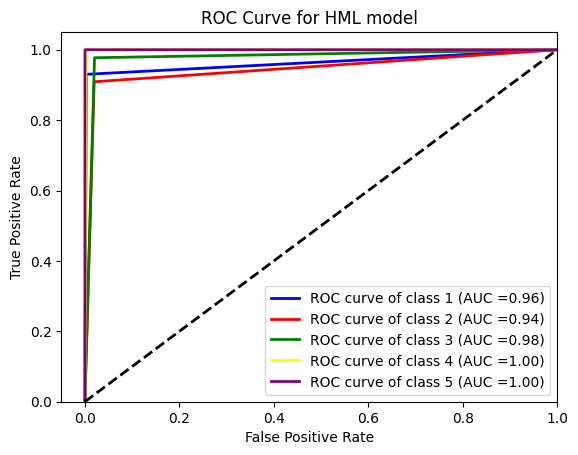

In [99]:
#HML ROC
roc_auc(y_testUS,y_hml, 'HML') 

#### Cohen's Kappa

In [100]:
def cohens(y,yhat,model):
    cohenskappa = cohen_kappa_score(y, yhat)
    return 'Cohens Kappa of {} is {:.3f}'.format(model,cohenskappa)
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'RFUS_CohensKappa'] = cohen_kappa_score(y_testUS, rfcUS_pred)
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_CohensKappa'] = cohen_kappa_score(y_testUS, yhat_classes)   
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'HMLUS_CohensKappa'] = cohen_kappa_score(y_testUS, y_hml) 

print("{}\n{}\n{}".format(cohens(y_testUS, rfcUS_pred, 'RF'),
                      cohens(y_testUS, yhat_classes, 'MLP'),
                         cohens(y_testUS, y_hml, 'HML')))   

Cohens Kappa of RF is 0.977
Cohens Kappa of MLP is 0.927
Cohens Kappa of HML is 0.954


#### Balanced Accuracy(BA)

In [101]:
#from sklearn.metrics import balanced_accuracy_score
def balanced_accuracy(y,yhat,model):
    BA = balanced_accuracy_score(y, yhat)
    return 'BA of {} is {:.3f}'.format(model,BA)
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'RFUS_BA'] = balanced_accuracy_score(y_testUS, rfcUS_pred)
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_BA'] = balanced_accuracy_score(y_testUS, yhat_classes)
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'HMLUS_BA'] = balanced_accuracy_score(y_testUS, y_hml)  

print("{}\n{}\n{}".format(balanced_accuracy(y_testUS,rfcUS_pred, 'RF'),
                      balanced_accuracy(y_testUS,yhat_classes, 'MLP'),
                         balanced_accuracy(y_testUS,y_hml, 'HML')))    

BA of RF is 0.981
BA of MLP is 0.941
BA of HML is 0.963


#### Geometric Mean (G-MEAN)

In [102]:
#from imblearn.metrics import geometric_mean_score
def gmean(y,yhat,model):
    gm = geometric_mean_score(y, yhat)
    return 'G-mean of {} is {:.3f}'.format(model,gm)
    
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'RFUS_GMEAN'] = geometric_mean_score(y_testUS, rfcUS_pred)
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_GMEAN'] = geometric_mean_score(y_testUS, yhat_classes)   
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'HMLUS_GMEAN'] = geometric_mean_score(y_testUS, y_hml) 

print("{}\n{}\n{}".format(gmean(y_testUS,rfcUS_pred, 'RF'),
                      gmean(y_testUS,yhat_classes, 'MLP'),
                     gmean(y_testUS,y_hml, 'HML')) )    
    

G-mean of RF is 0.981
G-mean of MLP is 0.940
G-mean of HML is 0.963


#### Negative Likelihood Ratio

In [103]:
def liR(y,yhat,model):
    #tn, fp, fn, tp = confusion_matrix(y, yhat).ravel()
    cm= confusion_matrix(y, yhat)
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1] 
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp + fn)
    lir = (1 - sensitivity)/specificity
    return 'Negative Likelihood Ratio of {} is {:.3f}'.format(model,lir)
def computeLiR(y,yhat):
    #tn, fp, fn, tp = confusion_matrix(y, yhat).ravel()
    cm= confusion_matrix(y, yhat)
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1] 
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp + fn)
    lir = (1 - sensitivity)/specificity
    return lir
    
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'RFUS_NLiR'] = computeLiR(y_testUS, rfcUS_pred)
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_NLiR'] = computeLiR(y_testUS, yhat_classes)   
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'HMLUS_NLiR'] = computeLiR(y_testUS, y_hml) 

print("{}\n{}\n{}".format(liR(y_testUS,rfcUS_pred, 'RF'),
                      liR(y_testUS,yhat_classes, 'MLP'),
                     liR(y_testUS,y_hml, 'HML')) )       

Negative Likelihood Ratio of RF is 0.022
Negative Likelihood Ratio of MLP is 0.041
Negative Likelihood Ratio of HML is 0.013


#### Discriminant Power

In [104]:
def diP(y,yhat,model):
    #tn, fp, fn, tp = confusion_matrix(y, yhat).ravel()
    import math
    cm= confusion_matrix(y, yhat)
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1] 
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp + fn)
    a = math.log(sensitivity/(1-sensitivity))
    b = math.log(specificity/(1-specificity))
    dp = math.sqrt(3/(22/7)*(a+b) )     
    return 'Discriminant Power of {} is {:.3f}'.format(model,dp)
    
def computeDiP(y,yhat):
    #tn, fp, fn, tp = confusion_matrix(y, yhat).ravel()
    import math
    cm= confusion_matrix(y, yhat)
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1] 
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp + fn)
    a = math.log(sensitivity/(1-sensitivity))
    b = math.log(specificity/(1-specificity))
    dp = math.sqrt(3/(22/7)*(a+b) )     
    return dp  
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'RFUS_DP'] = computeDiP(y_testUS, rfcUS_pred)
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_DP'] = computeDiP(y_testUS, yhat_classes)   
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'HMLUS_DP'] = computeDiP(y_testUS, y_hml) 

print("{}\n{}\n{}".format(diP(y_testUS,rfcUS_pred, 'RF'),
                      diP(y_testUS,yhat_classes, 'MLP'),
                         diP(y_testUS,y_hml, 'HML')) )      

Discriminant Power of RF is 2.615
Discriminant Power of MLP is 2.395
Discriminant Power of HML is 2.591


#### Youden’s Index

In [105]:
def yInd(y,yhat,model):
    cm= confusion_matrix(y, yhat)
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1] 
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp + fn)
    y_index = sensitivity - (1- specificity)     
    return 'Youden\'s Index of {} is {:.3f}'.format(model,y_index)
    
def ComputeYInd(y,yhat):
    cm= confusion_matrix(y, yhat)
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1] 
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp + fn)
    y_index = sensitivity - (1- specificity)     
    return y_index
    
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'RFUS_YInd'] = ComputeYInd(y_testUS, rfcUS_pred)
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_YInd'] = ComputeYInd(y_testUS, yhat_classes)   
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'HMLUS_YInd'] = ComputeYInd(y_testUS, y_hml) 

print("{}\n{}\n{}".format(yInd(y_testUS,rfcUS_pred, 'RF'),
                      yInd(y_testUS,yhat_classes, 'MLP'),
                      yInd(y_testUS,y_hml, 'HML')) )         

Youden's Index of RF is 0.944
Youden's Index of MLP is 0.904
Youden's Index of HML is 0.921


#### Type I and Type II errors

In [106]:
def typeI_errors(y,yhat,model):
    cm= confusion_matrix(y, yhat)
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1] 
    typeI = fn / (tp+fn)  
    return 'Type I error of {} is {:.3f}'.format(model,typeI)

    
def typeII_errors(y,yhat,model):
    cm= confusion_matrix(y, yhat)
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1] 
    typeII = fp / (tn + fp)    
    return 'Type II error of {} is {:.3f}'.format(model,typeII)
    
def computeTypeI_errors(y,yhat):
    cm= confusion_matrix(y, yhat)
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1] 
    typeI = fn / (tp+fn)  
    return typeI
    
def computeTypeII_errors(y,yhat):
    cm= confusion_matrix(y, yhat)
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1] 
    typeII = fp / (tn + fp)    
    return typeII

df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'RFUS_TypeIError'] = computeTypeI_errors(y_testUS, rfcUS_pred)
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_TypeIError'] = computeTypeI_errors(y_testUS, yhat_classes) 
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'HMLUS_TypeIError'] = computeTypeI_errors(y_testUS, y_hml) 
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'RFUS_TypeIIError'] = computeTypeII_errors(y_testUS, rfcUS_pred)
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'MLPUS_TypeIIError'] = computeTypeII_errors(y_testUS, yhat_classes) 
df_tmp_results.loc[df_tmp_results['sno']==sno_val, 'HMLUS_TypeIIError'] = computeTypeII_errors(y_testUS, y_hml) 

print("{}\n{}\n{}\n{}\n{}\n{}".format(typeI_errors(y_testUS,rfcUS_pred, 'RF'),
                      typeI_errors(y_testUS,yhat_classes, 'MLP'),
                      typeI_errors(y_testUS,y_hml, 'HML'),
                             typeII_errors(y_testUS,rfcUS_pred, 'RF'),
                      typeII_errors(y_testUS,yhat_classes, 'MLP'),
                      typeII_errors(y_testUS,y_hml, 'HML')) )  

Type I error of RF is 0.021
Type I error of MLP is 0.038
Type I error of HML is 0.012
Type II error of RF is 0.035
Type II error of MLP is 0.058
Type II error of HML is 0.067


In [107]:
# #update hybdrid data
# # Set values to empty where RF_Remarks is not '199 estimators' and model M6 does not contain '10-512-250-120-80-60-6'
# condition = (df_tmp_results['RF_Remarks'] != '199 estimators') & (~df_tmp_results['MLPUS_Remarks'].str.contains('10-512-250-120-80-60-6'))

# # Columns to set as empty
# columns_to_empty = ['HMLUS_Acc', 'HMLUS_Prec', 'HMLUS_F1', 'HMLUS_Recall', 
#                     'HML_ROC_Class1', 'HML_ROC_Class2', 'HML_ROC_Class3', 'HML_ROC_Class4', 'HML_ROC_Class5',
#                     'HMLUS_CohensKappa', 'HMLUS_BA', 'HMLUS_GMEAN', 'HMLUS_NLiR', 'HMLUS_DP', 'HMLUS_YInd',
#                     'HMLUS_TypeIError', 'HMLUS_TypeIIError','HMLUS_Remarks']
# , 
# # Update the DataFrame based on the conditions
# df_tmp_results.loc[condition, columns_to_empty] = ''

# condition2 = (df_results['RF_Remarks'] != '199 estimators') & (~df_results['MLPUS_Remarks'].str.contains('10-512-250-120-80-60-6'))

# # Columns to set as empty
# columns_to_empty = ['HMLUS_Acc', 'HMLUS_Prec', 'HMLUS_F1', 'HMLUS_Recall', 
#                     'HML_ROC_Class1', 'HML_ROC_Class2', 'HML_ROC_Class3', 'HML_ROC_Class4', 'HML_ROC_Class5',
#                     'HMLUS_CohensKappa', 'HMLUS_BA', 'HMLUS_GMEAN', 'HMLUS_NLiR', 'HMLUS_DP', 'HMLUS_YInd',
#                     'HMLUS_TypeIError', 'HMLUS_TypeIIError','HMLUS_Remarks']
# , 
# # Update the DataFrame based on the conditions
# df_results.loc[condition2, columns_to_empty] = ''


In [108]:
#Save results
df_results = pd.concat([df_results, df_tmp_results], axis=0)
df_results.to_csv(config.results)

In [109]:
#display updated results file
df_results_display = pd.read_csv(config.results)
unnamedCols2 = [col for col in df_results_display.columns if 'Unnamed' in str(col)]
df_results_display.drop(columns=unnamedCols2, inplace=True)
#df_results_display['date'] = pd.to_datetime(df_results_display['date']) 
df_results_display[['sno', 'date','MLPUS_Acc','MLPUS_Prec','MLPUS_F1','MLPUS_Recall','MLPUS_TrTime']].tail()
df_results_display

,sno,date,BANKSIZE,LR,EWAQ_NPLsNetOfProvisions,EWAQ_NPL,EWAQ_NPLsNetOfProvisions2CoreCapital,CD_TO_TOTAL_ASSET,LIQASSET2TOTALASSET,LIQASSET2DEPOSIT,...,RFUS_Prec,RFUS_Recall,RFUS_ROC_Class1,RFUS_ROC_Class2,RFUS_ROC_Class3,RFUS_ROC_Class4,RFUS_ROC_Class5,RFUS_TypeIError,RFUS_TypeIIError,RFUS_YInd
0,1,2023-11-16,ok,ok,ok,ok,ok,ok,ok,ok,...,0.981563,0.981419,0.979367,0.975396,0.987378,0.999958,0.999917,0.020776,0.035275,0.943949


In [110]:
df_results_display.tail()

,sno,date,BANKSIZE,LR,EWAQ_NPLsNetOfProvisions,EWAQ_NPL,EWAQ_NPLsNetOfProvisions2CoreCapital,CD_TO_TOTAL_ASSET,LIQASSET2TOTALASSET,LIQASSET2DEPOSIT,...,RFUS_Prec,RFUS_Recall,RFUS_ROC_Class1,RFUS_ROC_Class2,RFUS_ROC_Class3,RFUS_ROC_Class4,RFUS_ROC_Class5,RFUS_TypeIError,RFUS_TypeIIError,RFUS_YInd
0,1,2023-11-16,ok,ok,ok,ok,ok,ok,ok,ok,...,0.981563,0.981419,0.979367,0.975396,0.987378,0.999958,0.999917,0.020776,0.035275,0.943949


In [111]:
#Mean RF results after Dataset Balancing (Except ROC)
#df_results_display.groupby(['RF_Remarks'])['RF_Remarks','RFUS_Acc','RFUS_Prec','RFUS_F1','RFUS_Recall','RFUS_BA','RFUS_CohensKappa','RFUS_DP','RFUS_GMEAN','RFUS_NLiR','RFUS_TypeIError','RFUS_TypeIIError','RFUS_YInd'].mean()
df_results_display.groupby(['RF_Remarks'])[['RFUS_Acc', 'RFUS_Prec', 'RFUS_F1', 'RFUS_Recall', 'RFUS_BA', 'RFUS_CohensKappa', 'RFUS_DP', 'RFUS_GMEAN', 'RFUS_NLiR', 'RFUS_TypeIError', 'RFUS_TypeIIError', 'RFUS_YInd']].mean()


,RFUS_Acc,RFUS_Prec,RFUS_F1,RFUS_Recall,RFUS_BA,RFUS_CohensKappa,RFUS_DP,RFUS_GMEAN,RFUS_NLiR,RFUS_TypeIError,RFUS_TypeIIError,RFUS_YInd
RF_Remarks,,,,,,,,,,,,
199 estimators,0.981419,0.981563,0.981457,0.981419,0.981442,0.976773,2.614597,0.981312,0.021535,0.020776,0.035275,0.943949


In [112]:
#Mean RF ROC results after Dataset Balancing
df_results_display.groupby(['RF_Remarks'])[['RFUS_ROC_Class1','RFUS_ROC_Class2','RFUS_ROC_Class3','RFUS_ROC_Class4','RFUS_ROC_Class5']].mean()


,RFUS_ROC_Class1,RFUS_ROC_Class2,RFUS_ROC_Class3,RFUS_ROC_Class4,RFUS_ROC_Class5
RF_Remarks,,,,,
199 estimators,0.979367,0.975396,0.987378,0.999958,0.999917


In [113]:
#Mean HML results (except ROC)
df_results_display.groupby(['HMLUS_Remarks'])[['HMLUS_Acc','HMLUS_Prec','HMLUS_F1','HMLUS_Recall','HMLUS_BA','HMLUS_CohensKappa','HMLUS_DP','HMLUS_GMEAN','HMLUS_NLiR','HMLUS_TypeIError','HMLUS_TypeIIError','HMLUS_YInd']].mean()
 

,HMLUS_Acc,HMLUS_Prec,HMLUS_F1,HMLUS_Recall,HMLUS_BA,HMLUS_CohensKappa,HMLUS_DP,HMLUS_GMEAN,HMLUS_NLiR,HMLUS_TypeIError,HMLUS_TypeIIError,HMLUS_YInd
HMLUS_Remarks,,,,,,,,,,,,
Hybrid of R2(RF) and M6(MLP) Models,0.963303,0.963926,0.963271,0.963303,0.963264,0.95413,2.590933,0.962536,0.013103,0.012231,0.066537,0.921232


In [114]:
#Mean HML ROC results 
df_results_display.groupby(['HMLUS_Remarks'])[['HML_ROC_Class1','HML_ROC_Class2','HML_ROC_Class3','HML_ROC_Class4','HML_ROC_Class5']].mean()


,HML_ROC_Class1,HML_ROC_Class2,HML_ROC_Class3,HML_ROC_Class4,HML_ROC_Class5
HMLUS_Remarks,,,,,
Hybrid of R2(RF) and M6(MLP) Models,0.963561,0.944661,0.978436,0.998709,0.999917


In [115]:
#Mean MLP results (Except ROC)
df_results_display.groupby(['MLPUS_Remarks'])[['MLPUS_Acc','MLPUS_Prec','MLPUS_F1','MLPUS_Recall','MLPUS_BA','MLPUS_CohensKappa','MLPUS_DP','MLPUS_GMEAN','MLPUS_NLiR','MLPUS_TypeIError','MLPUS_TypeIIError','MLPUS_YInd']].mean()
  

,MLPUS_Acc,MLPUS_Prec,MLPUS_F1,MLPUS_Recall,MLPUS_BA,MLPUS_CohensKappa,MLPUS_DP,MLPUS_GMEAN,MLPUS_NLiR,MLPUS_TypeIError,MLPUS_TypeIIError,MLPUS_YInd
MLPUS_Remarks,,,,,,,,,,,,
"MLP Architecture:Model M6: 10-512-250-120-80-60-6 Dropout None, Loss:sparse_categorical_crossentropy, Optimizer:ADAM, epochs:30, validation_split:0.3",0.941259,0.942312,0.941246,0.941259,0.940989,0.926569,2.395352,0.940302,0.040819,0.038462,0.057755,0.903784


In [116]:
#Mean MLP ROC results
df_results_display.groupby(['MLPUS_Remarks'])[['MLPUS_ROC_Class1', 'MLPUS_ROC_Class2', 'MLPUS_ROC_Class3', 'MLPUS_ROC_Class4', 'MLPUS_ROC_Class5']].mean()




,MLPUS_ROC_Class1,MLPUS_ROC_Class2,MLPUS_ROC_Class3,MLPUS_ROC_Class4,MLPUS_ROC_Class5
MLPUS_Remarks,,,,,
"MLP Architecture:Model M6: 10-512-250-120-80-60-6 Dropout None, Loss:sparse_categorical_crossentropy, Optimizer:ADAM, epochs:30, validation_split:0.3",0.964986,0.930804,0.962495,0.990505,0.967018
